In [92]:
import sys
import os
import requests
import json
import pandas as pd
import numpy as np

import seaborn as sns
# import matplotlib
import matplotlib.pyplot as plt # Typical way of import MPL
import matplotlib as mpl # This line is used less frequently

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [18]:

file='fulldata.json'
f=open(file)
data=pd.read_json(f)

In [19]:
#remove risk and score attributes, remove the first and last row 
data=data.transpose()
data=data.drop(columns=['risk','score'],axis=1)
data=data.drop(['{file}','0'])

In [20]:
data.head()
data.shape
data.describe()

,date,index,location,now frequency,stock,time,urgent frequency,wrong cap ratio,attacker estimated age,attacker relationship,...,sentiment analysis,social_engineering,stock_close,stock_open,stock_volume,title,unknown count,wrongspellnumber,ip_risk,ip_score
count,4029,4029,3923,4029,947,4029,4029,4029,3981.000000,3906,...,4029,4029,3082.0,3082.000000,3082,4028,3894,4028,516,516
unique,1389,4029,639,12,1,3721,9,431,3296.000000,7,...,4,2,1013.0,1011.000000,1001,5,39,126,4,31
top,unknown,4029,"[{'lat': 37.09024, 'lng': -95.712891}]",0,unknown,unknown,0,0.069,29.826298,"[online, friend of a friend, person]",...,neutral,1,1122.5,1258.410034,1251700000,Name,0,13,low,0
freq,53,1,284,1951,947,53,2356,71,10.000000,3314,...,2377,3056,15.0,15.000000,16,2210,930,188,415,285


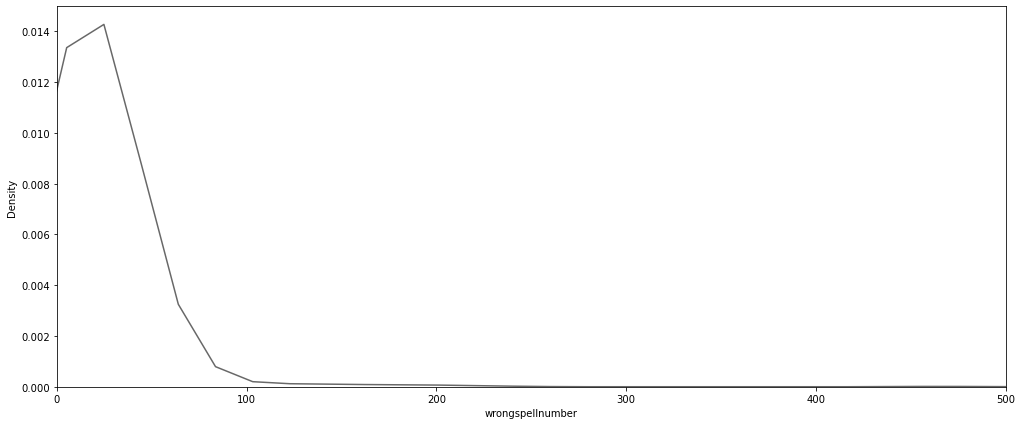

In [21]:
#density plot of wrongspellnumber
plt.rcParams['figure.figsize'] = (17, 7)
wrongspell=data[data['wrongspellnumber'] != 'N/A']['wrongspellnumber'].dropna()
plt.xlim(0, 500)
ax = sns.distplot(wrongspell,hist=False,
                  bins=10, color='#686868')

In [22]:
title=data['title'].dropna()
title.unique()

array(['General Prefix', 'Royal', 'Name', 'Occupation', 'Not available'],
      dtype=object)

Text(0.5, 0, 'Titles')

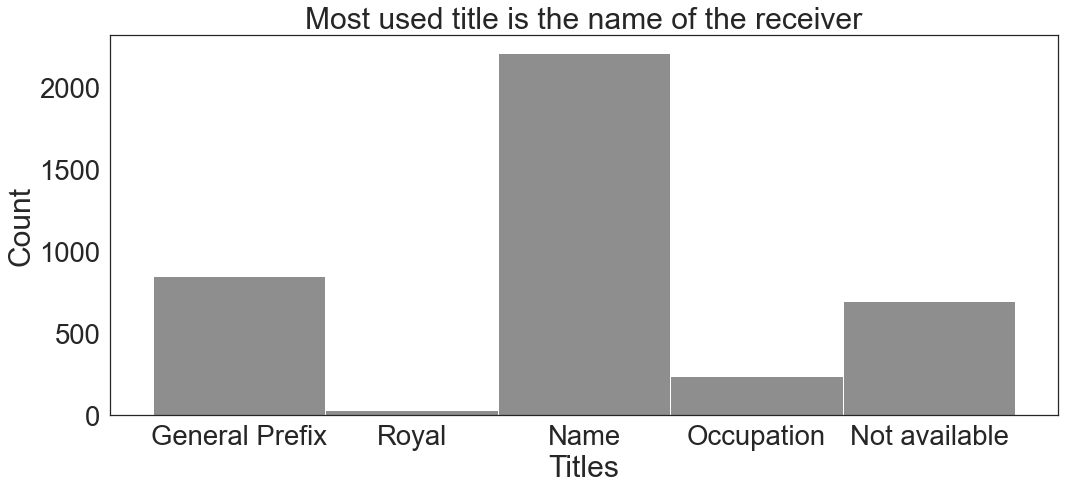

In [23]:
#histogram of most used title
sns.set(font_scale=2.5, style="white")
sns.despine()
t=sns.histplot(data=title,color='#686868')
t.set_title('Most used title is the name of the receiver')
t.set_ylabel('Count')
t.set_xlabel('Titles')


Text(0.5, 0, 'ip_risk')

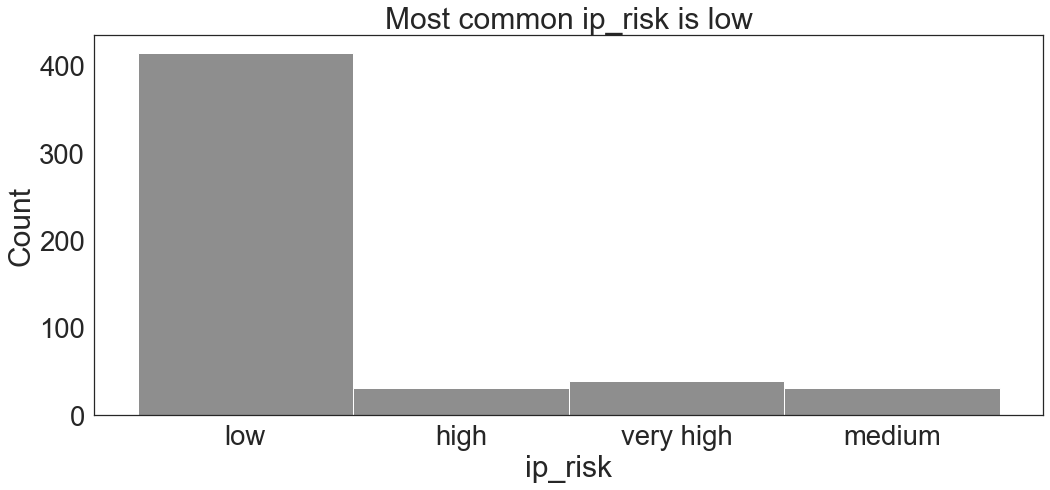

In [24]:
sns.set(font_scale=2.5, style="white")
sns.despine()
t=sns.histplot(data=data['ip_risk'].dropna(),color='#686868')
t.set_title('Most common ip_risk is low')
t.set_ylabel('Count')
t.set_xlabel('ip_risk')

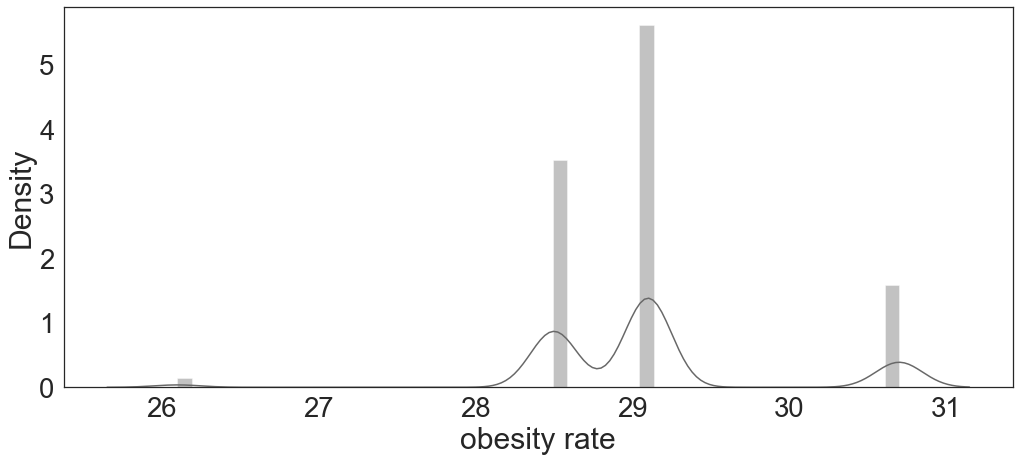

In [43]:
obesity=data[data['obesity rate'] != 'N/A']['obesity rate']
o=sns.distplot(obesity,color='#686868')


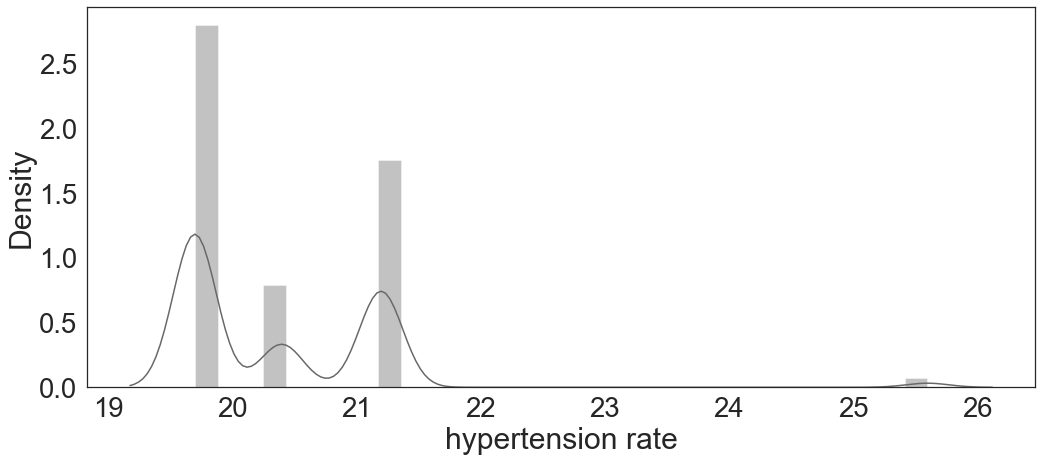

In [46]:
hyp=data[data['hypertension rate'] != 'N/A']['hypertension rate']
h=sns.distplot(hyp,color='#686868')

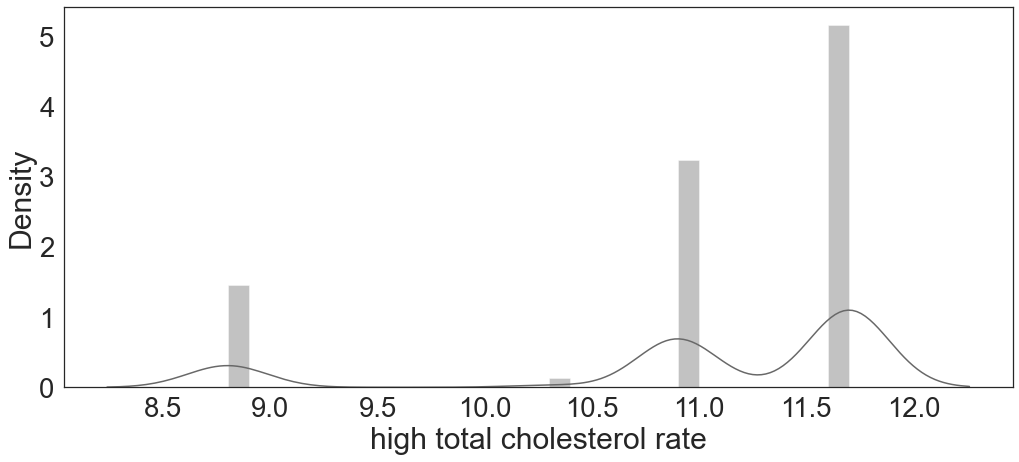

In [48]:
ht=data[data['high total cholesterol rate'] != 'N/A']['high total cholesterol rate']
o=sns.distplot(ht,color='#686868')

In [89]:
date_spell=data[['wrongspellnumber','date']].dropna()
date_spell=date_spell[date_spell['wrongspellnumber']!='N/A']
date_spell


,wrongspellnumber,date
1,27,10/30/02
2,14,10/31/02
3,21,10/31/02
4,22,10/31/02
5,21,11/01/02
...,...,...
4025,18,09/17/07
4026,12,09/17/07
4027,27,09/18/07
4028,22,09/18/07


In [101]:
#搞不定了，画不动了，一直报错了
#date=datetime.strptime(date_spell['date'],'%x')
#for i in range(len(date_spell['date'])):
 #   date_spell['year'][i]=date_spell['date'][i][-2:]

In [97]:
type(data['date'][2])

str